### `Graphs of Theia showing last 50 hours before sncc`
*This notebook contains graphs of Theia showing the last 50 hours before supernova collapse*

Graph #1: Evolution of significance level in Theia (Note: this is Figure 7 in the Super-K paper but using Theia)

Graph #2: Number of IBD events as a function of distance (Note: this is Figure 8 in the Super-K paper but using Theia)

### Graph #1: Evolution of significance level in Theia

In [63]:
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

from snewpy import snowglobes

SNOwGLoBES_path = '/Users/peterasljung/Desktop/snowglobes/' # to use custom SNOwGLoBES detector/channel/smearing files, set SNOwGLoBES directory
SNEWPY_models_base = "../../models/"   # directory containing SNEWPY models

In [64]:
#Detector
detector = "wc100kt30prct"

#Betelgeuse
distance = 0.2
modeltype_O = 'Odrzywolek_2010'
modeltype_P = 'Patton_2017'

transformation = 'NoTransformation'  #'AdiabaticMSW_NMO'
transformation_INV = 'NoTransformation' #'AdiabaticMSW_IMO'

#Define time window
window_tstart = - 180000
window_tend = 0
window_bins = 100
tstart = np.linspace(window_tstart, window_tend, window_bins, endpoint=False) * u.s
tend = tstart + (window_tend - window_tstart) / window_bins * u.s
tmid = (tstart + tend) * 0.5

In [65]:
#Odrzywolek 15 solar masses
model_O_15 = 's15_nuebar_data'
modelfile_O_15 = SNEWPY_models_base + "presn-models/" + modeltype_O + "/" + model_O_15 + '.txt'

#Normal mass
outfile_O_15 = modeltype_O+"_"+model_O_15+"_"+transformation

#Inverted mass
outfile_O_15_INV = modeltype_O +"_"+model_O_15+"_"+transformation_INV

In [66]:
#Odrzywolek 25 solar masses
model_O_25 = 's25_nuebar_data'
modelfile_O_25 = SNEWPY_models_base + "presn-models/" + modeltype_O + "/" + model_O_25 + '.txt'

#Normal mass
outfile_O_25 = modeltype_O+"_"+model_O_25+"_"+transformation

#Inverted mass
outfile_O_25_INV = modeltype_O +"_"+model_O_25+"_"+transformation_INV

In [67]:
#Patton 15 solar masses
model_P = 'totalLuminosity_15SolarMass'
modelfile_P = SNEWPY_models_base + "presn-models/" + modeltype_P + "/" + model_P + '.dat'

#Normal mass
outfile_P = modeltype_P +"_"+model_P+"_"+transformation

#Inverted mass
outfile_P_INV = modeltype_P +"_"+model_P+"_"+transformation_INV

In [68]:
#modelfile = SNEWPY_models_base + "presn-models/" + modeltype + "/" + model + '.txt'
#outfile = modeltype+"_"+model+"_"+transformation

In [69]:
#Generate Patton normal

tarredfile_P = snowglobes.generate_fluence(modelfile_P, modeltype_P, transformation, distance, outfile_P, tstart, tend)

snowglobes.simulate(SNOwGLoBES_path, tarredfile_P, detector_input=detector)

tables_P = snowglobes.collate(SNOwGLoBES_path, tarredfile_P, skip_plots=True)

In [70]:
#Generate Patton inverted

tarredfile_P_INV = snowglobes.generate_fluence(modelfile_P, modeltype_P, transformation_INV, distance, outfile_P_INV, tstart, tend)

snowglobes.simulate(SNOwGLoBES_path, tarredfile_P_INV, detector_input=detector)

tables_P_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_P_INV, skip_plots=True)

In [71]:
#Generate Odrzywolek 15 normal

tarredfile_O = snowglobes.generate_fluence(modelfile_O_15, modeltype_O, transformation, distance, outfile_O_15, tstart, tend)

snowglobes.simulate(SNOwGLoBES_path, tarredfile_O, detector_input=detector)

tables_O_15 = snowglobes.collate(SNOwGLoBES_path, tarredfile_O, skip_plots=True)

In [72]:
#Generate Odrzywolek 15 inverted

tarredfile_O_INV = snowglobes.generate_fluence(modelfile_O_15, modeltype_O, transformation_INV, distance, outfile_O_15_INV, tstart, tend)

snowglobes.simulate(SNOwGLoBES_path, tarredfile_O_INV, detector_input=detector)

tables_O_15_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_O_INV, skip_plots=True)

In [73]:
#Generate Odrzywolek 25 normal

tarredfile_O_25 = snowglobes.generate_fluence(modelfile_O_25, modeltype_O, transformation, distance, outfile_O_25, tstart, tend)

snowglobes.simulate(SNOwGLoBES_path, tarredfile_O_25, detector_input=detector)

tables_O_25 = snowglobes.collate(SNOwGLoBES_path, tarredfile_O_25, skip_plots=True)

In [74]:
#Generate Odrzywolek 25 inverted

tarredfile_O_25_INV = snowglobes.generate_fluence(modelfile_O_25, modeltype_O, transformation_INV, distance, outfile_O_25_INV, tstart, tend)

snowglobes.simulate(SNOwGLoBES_path, tarredfile_O_25_INV, detector_input=detector)

tables_O_25_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_O_25_INV, skip_plots=True)

In [75]:
import math
significance_O_15 = []
significance_O_15_INV = []
significance_O_25 = []
significance_O_25_INV = []
significance_P = []
significance_P_INV = []

nevents_O_15 = np.zeros(len(tmid))
nevents_O_15_INV = np.zeros(len(tmid))
nevents_O_25 = np.zeros(len(tmid))
nevents_O_25_INV = np.zeros(len(tmid))
nevents_P = np.zeros(len(tmid))
nevents_P_INV = np.zeros(len(tmid))

In [76]:
for i in range(len(tmid)):
    key_O_15 = f"Collated_{outfile_O_15}_{i}_{detector}_events_smeared_weighted.dat"
    for j in range(1,len(tables_O_15[key_O_15]['header'].split())):
        nevents_O_15[i] += sum(tables_O_15[key_O_15]['data'][j])

for i in range(len(tmid)):
    key_O_15_INV = f"Collated_{outfile_O_15_INV}_{i}_{detector}_events_smeared_weighted.dat"
    for j in range(1,len(tables_O_15_INV[key_O_15_INV]['header'].split())):
        nevents_O_15_INV[i] += sum(tables_O_15_INV[key_O_15_INV]['data'][j])

for i in range(len(tmid)):
    key_O_25 = f"Collated_{outfile_O_25}_{i}_{detector}_events_smeared_weighted.dat"
    for j in range(1,len(tables_O_25[key_O_25]['header'].split())):
        nevents_O_25[i] += sum(tables_O_25[key_O_25]['data'][j])

for i in range(len(tmid)):
    key_O_25_INV = f"Collated_{outfile_O_25_INV}_{i}_{detector}_events_smeared_weighted.dat"
    for j in range(1,len(tables_O_25_INV[key_O_25_INV]['header'].split())):
        nevents_O_25_INV[i] += sum(tables_O_25_INV[key_O_25_INV]['data'][j])

for i in range(len(tmid)):
    key_P = f"Collated_{outfile_P}_{i}_{detector}_events_smeared_weighted.dat"
    for j in range(1,len(tables_P[key_P]['header'].split())):
        nevents_P[i] += sum(tables_P[key_P]['data'][j])

for i in range(len(tmid)):
    key_P_INV = f"Collated_{outfile_P_INV}_{i}_{detector}_events_smeared_weighted.dat"
    for j in range(1,len(tables_P_INV[key_P_INV]['header'].split())):
        nevents_P_INV[i] += sum(tables_P_INV[key_P_INV]['data'][j])

In [77]:
#Since we're using constant background we're assuming zero events before time starts
b = 2.4 #2.5 Super K 50 hours, 5.1258 Theia 48 hours, 0.142 KamLAND 48 hours
s = 0

for k in nevents_O_15:
    s += (k * 0.225 * 0.74) #s += (k * 0.225 * 0.74) for Super K # (k/20) for KamLAND
    sig = math.sqrt(2 * (((s + b) * math.log(1 + (s/b))) - s))
    significance_O_15.append(sig)
s = 0
for k in nevents_O_15_INV:
    s += (k * 0.225 * 0.21)
    sig = math.sqrt(2 * (((s + b) * math.log(1 + (s/b))) - s))
    significance_O_15_INV.append(sig)
s = 0
for k in nevents_O_25:
    s += (k * 0.225 * 0.74)
    sig = math.sqrt(2 * (((s + b) * math.log(1 + (s/b))) - s))
    significance_O_25.append(sig)
s = 0
for k in nevents_O_25_INV:
    s += (k * 0.225 * 0.21)
    sig = math.sqrt(2 * (((s + b) * math.log(1 + (s/b))) - s))
    significance_O_25_INV.append(sig)
s = 0
for k in nevents_P:
    s += (k * 0.225 * 0.74)
    sig = math.sqrt(2 * (((s + b) * math.log(1 + (s/b))) - s))
    significance_P.append(sig)
s = 0
for k in nevents_P_INV:
    s += (k * 0.225 * 0.21)
    sig = math.sqrt(2 * (((s + b) * math.log(1 + (s/b))) - s))
    significance_P_INV.append(sig)

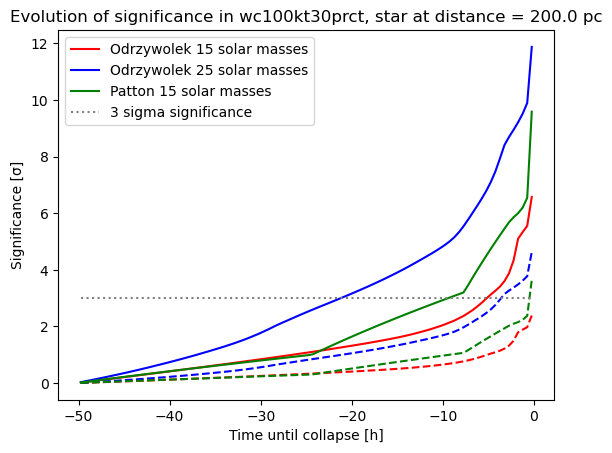

In [83]:
#PLOT
y = [3] * len(significance_O_15) #For plotting the significance line

tmid_h = tmid.to(u.hour)
plt.plot(tmid_h, significance_O_15, color='red', label = 'Odrzywolek 15 solar masses')
plt.plot(tmid_h, significance_O_15_INV, color='red', linestyle='dashed')
plt.plot(tmid_h, significance_O_25, color='blue', label = 'Odrzywolek 25 solar masses')
plt.plot(tmid_h, significance_O_25_INV, color='blue', linestyle='dashed')
plt.plot(tmid_h, significance_P, color='green', label = 'Patton 15 solar masses')
plt.plot(tmid_h, significance_P_INV, color='green', linestyle='dashed')
plt.plot(tmid_h, y, color='gray', linestyle ='dotted', label = '3 sigma significance')
plt.legend()
plt.title('Evolution of significance in {}, star at distance = {} pc'.format(detector, distance * 1000))
plt.xlabel("Time until collapse [h]")
plt.ylabel("Significance [σ]")
plt.show()

### Graph #2: Number of IBD events as a function of distance

In [81]:
#Initiate list of distances
distance_list = np.arange(20, 1000, 49) #in pc

#Find total number of events for each model
total_events_O_15 = sum(nevents_O_15)
total_events_O_15_INV = sum(nevents_O_15_INV)
total_events_O_25 = sum(nevents_O_25)
total_events_O_25_INV = sum(nevents_O_25_INV)
total_events_P = sum(nevents_P)
total_events_P_INV = sum(nevents_P_INV)

#Initiate list to store number of events at different distances
range_events_O_15 = []
range_events_O_15_INV = []
range_events_O_25 = []
range_events_O_25_INV = []
range_events_P = []
range_events_P_INV = [] 

for d in distance_list:
    diff = d/(distance * 1000)
    e = total_events_O_15 / (diff**2)
    v = total_events_O_15_INV / (diff**2)
    a = total_events_O_25 / (diff**2)
    n = total_events_O_25_INV / (diff**2)
    t = total_events_P / (diff**2)
    s = total_events_P_INV / (diff**2)

    range_events_O_15.append(e)
    range_events_O_15_INV.append(v)
    range_events_O_25.append(a)
    range_events_O_25_INV.append(n)
    range_events_P.append(t)
    range_events_P_INV.append(s)

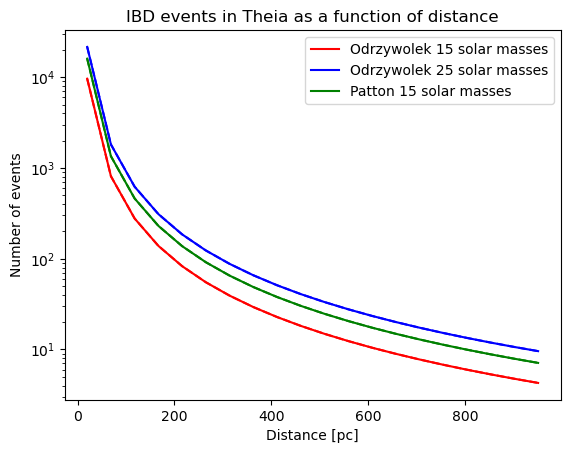

In [82]:
plt.plot(distance_list, range_events_O_15, color='red', label = 'Odrzywolek 15 solar masses')
plt.plot(distance_list, range_events_O_15_INV, color='red', linestyle = 'dashed')
plt.plot(distance_list, range_events_O_25, color='blue', label = 'Odrzywolek 25 solar masses')
plt.plot(distance_list, range_events_O_25_INV, color='blue', linestyle = 'dashed')
plt.plot(distance_list, range_events_P, color='green', label = 'Patton 15 solar masses')
plt.plot(distance_list, range_events_P_INV, color='green', linestyle = 'dashed')
plt.legend()
plt.yscale('log')
plt.title('IBD events in Theia as a function of distance')
plt.xlabel("Distance [pc]")
plt.ylabel("Number of events")
plt.show()